In [1]:
import soundfile as sf
import librosa
import numpy as np

In [2]:
filename = "./wav/voice.wav"

In [3]:
y, sr = sf.read(filename, dtype='int16')

print("Sample Rate: ", sr)
print("DATA       : ", type(y), y.shape, y)


Sample Rate:  16000
DATA       :  <class 'numpy.ndarray'> (48944,) [ -9   1  -5 ... -20 -16 -24]


In [5]:
y, sr = librosa.load(filename, mono=True, sr=16000)

print("Sample Rate: ", sr)
print("DATA       : ", type(y), y.shape, y)


Sample Rate:  16000
DATA       :  <class 'numpy.ndarray'> (48944,) [-2.7465820e-04  3.0517578e-05 -1.5258789e-04 ... -6.1035156e-04
 -4.8828125e-04 -7.3242188e-04]


In [6]:
!ffprobe -i ./wav/voice.wav

ffprobe version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2007-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --en

In [7]:
!file "./wav/voice.wav"

./wav/voice.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 16000 Hz


In [8]:
!file "./wav/cafe_noise.wav"

./wav/cafe_noise.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 16000 Hz


In [9]:
import IPython.display as ipd
ipd.Audio(filename) # load a local WAV file

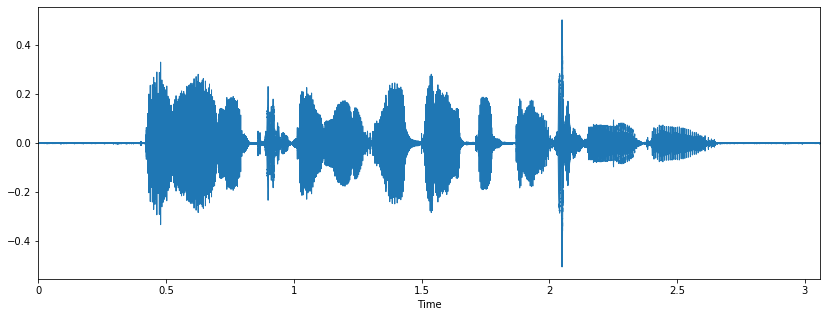

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [11]:
import numpy
sr = 16000 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

ipd.Audio(x, rate=sr) # load a NumPy array

In [12]:
D = librosa.stft(y)
print(D)

D_mag = np.abs(D)
print(D_mag)
print(D_mag.shape)

magnitude, phase = librosa.magphase(D)

print(magnitude)
print(magnitude.shape)

print(magnitude-D_mag)


[[-2.1494275e-01+0.0000000e+00j -2.0992082e-01+0.0000000e+00j
  -2.0418610e-01+0.0000000e+00j ... -1.9438802e-01+0.0000000e+00j
  -1.9518623e-01+0.0000000e+00j -2.3163199e-01+0.0000000e+00j]
 [ 9.3493842e-02+6.9388939e-18j  1.2481287e-01+4.8880498e-03j
   7.3961377e-02+1.3274251e-03j ...  7.7925511e-02-1.7781712e-02j
   9.6285135e-02+1.7115690e-02j  1.1564651e-01-5.2810002e-02j]
 [ 1.9829417e-02+0.0000000e+00j -3.1706840e-02+1.5587136e-02j
   5.7078212e-02-2.0519590e-02j ...  2.3265863e-02+7.6752454e-02j
   3.0044108e-03-6.0352467e-02j  5.4616658e-03+6.8522707e-02j]
 ...
 [-5.3125373e-03+0.0000000e+00j  3.4157380e-03-1.7295172e-03j
  -1.8859134e-03-3.5993013e-04j ... -7.6227036e-04-9.3025468e-05j
  -1.8814437e-04-8.4138475e-05j  4.7763987e-04-5.3400453e-04j]
 [ 2.1248308e-03+0.0000000e+00j -1.4035926e-03+8.0862024e-05j
   2.4144542e-03+3.4830419e-04j ... -2.3595782e-04+1.1687888e-03j
   1.1331354e-04+1.2911476e-04j  2.8909228e-04+3.3650018e-04j]
 [-8.1756472e-04+0.0000000e+00j -9.35294

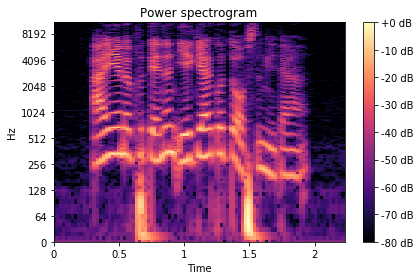

In [13]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(magnitude,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

(128, 96)


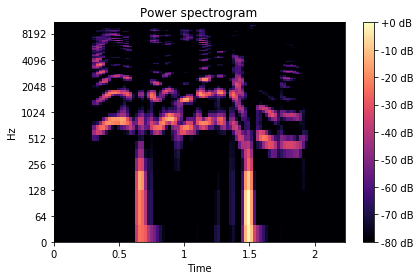

In [34]:
mel_s = librosa.feature.melspectrogram(y=y, sr=sr)
print(mel_s.shape)

import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(mel_s,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [14]:
67451 / 512

131.740234375

(40, 96)


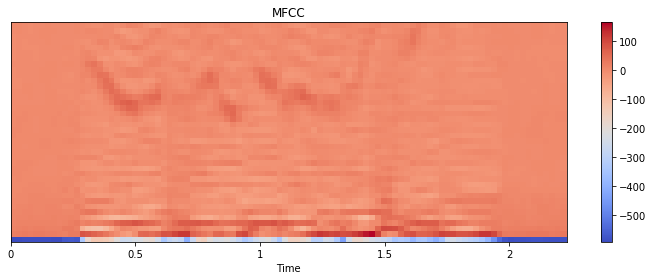

In [15]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

print(mfccs.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

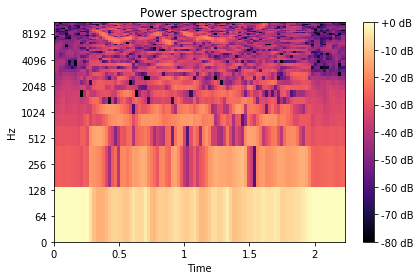

In [16]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(mfccs,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [17]:
filename_wav = "./wav/voice.wav"
filename_noise = "./wav/cafe_noise.wav"

In [18]:
import IPython.display as ipd
ipd.Audio(filename_wav)

In [19]:
import IPython.display as ipd
ipd.Audio(filename_noise)

In [20]:
data_wav, sr_wav = librosa.load(filename_wav, mono=True, sr=16000)
data_noise, sr_noise = librosa.load(filename_noise, mono=True, sr=16000)


print(data_wav.shape)
print(data_noise.shape)


data_wav_noise = data_wav[:] + data_noise[:len(data_wav)]

pos=10
print("wav: {:.8f}, noise {:.8f}, wav+noise: {:.8f}".format(data_wav[pos], data_noise[pos], data_wav_noise[pos]))

(48944,)
(1044712,)
wav: -0.00009155, noise -0.00003052, wav+noise: -0.00012207


In [21]:
ipd.Audio(data_wav_noise, rate=16000) # load a NumPy array